<a href="https://colab.research.google.com/github/U-kongkong/interactive-game/blob/main/1107_Audio_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Processing

## 1. Waveform

In [1]:
# Import packages
import librosa
import numpy as np

In [10]:
# Load audio
audio, sr = librosa.load("audio.wav")

In [4]:
print(audio)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.3494839e-12
 -5.3329251e-12 -7.4537434e-12]


In [5]:
print(audio.shape)

(62975,)


In [6]:
print(audio[0])

0.0


In [7]:
print(sr)

22050


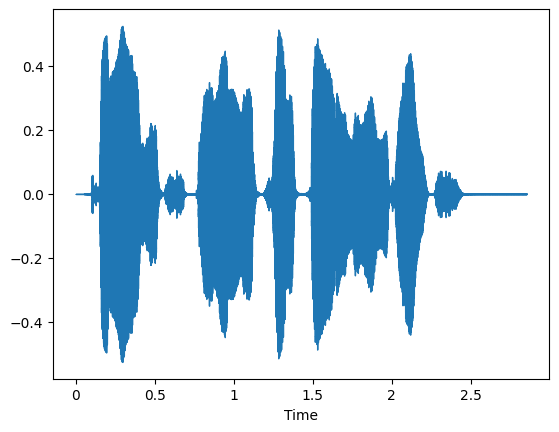

In [8]:
# Visualize audio
librosa.display.waveshow(audio, sr=sr)

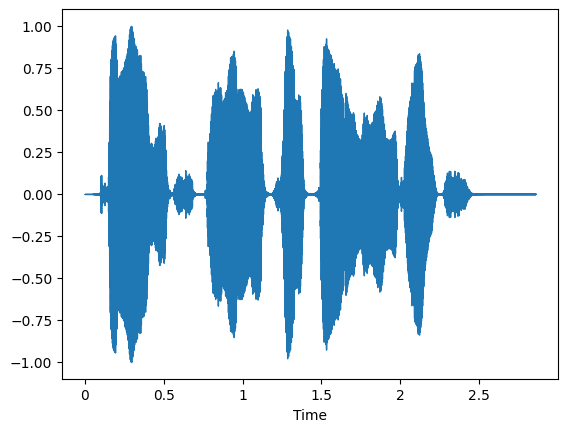

In [9]:
# Normalize audio
norm_audio = librosa.util.normalize(audio)
librosa.display.waveshow(norm_audio, sr=sr)

## 2. Spectrogram

In [ ]:
# Pre-emphasis
pre_audio = librosa.effects.preemphasis(norm_audio)

In [ ]:
# Short-time Fourier Transform (STFT)
n_fft = 2048
win_length = 2048
hop_length = 512

spec = librosa.stft(pre_audio, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
spec = np.abs(spec) ** 2

In [ ]:
# Amplitude -> dB
spec_db = librosa.power_to_db(spec, ref=np.max)
librosa.display.specshow(spec_db, sr=sr, x_axis="time", y_axis="linear")

## 3. Mel-scale Spectrogram

In [ ]:
mel_spec = librosa.feature.melspectrogram(sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=win_length, fmax=8000, S=spec)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel", fmax=8000)